In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries Imported.")

Libraries Imported.


In [3]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
area = df['area']
area.value_counts()

area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64

In [8]:
length = list(area.value_counts().keys())
no_of_plot = list(area.value_counts().values)

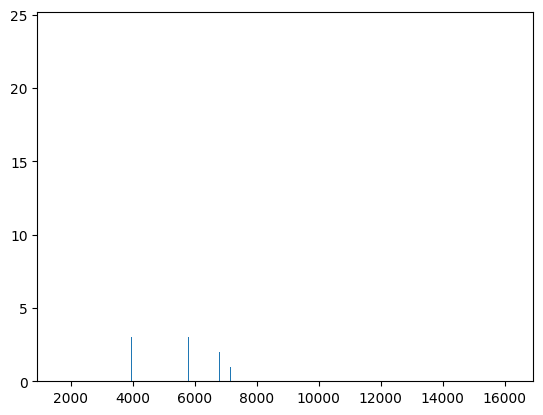

In [9]:
plt.bar(length,no_of_plot)
plt.show()

In [10]:
cat_col = df.select_dtypes(include='O')
cat_col.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [11]:
num_col = df.select_dtypes(exclude='O')
num_col.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [13]:
furnishing_group = df.groupby('furnishingstatus')
furnishing_record = furnishing_group['price'].agg(min_price='min',max_price='max',avg_price='mean')
furnishing_record

,min_price,max_price,avg_price
furnishingstatus,,,
furnished,1750000,13300000,5.495696e+06
semi-furnished,1767150,12250000,4.907524e+06
unfurnished,1750000,10150000,4.013831e+06


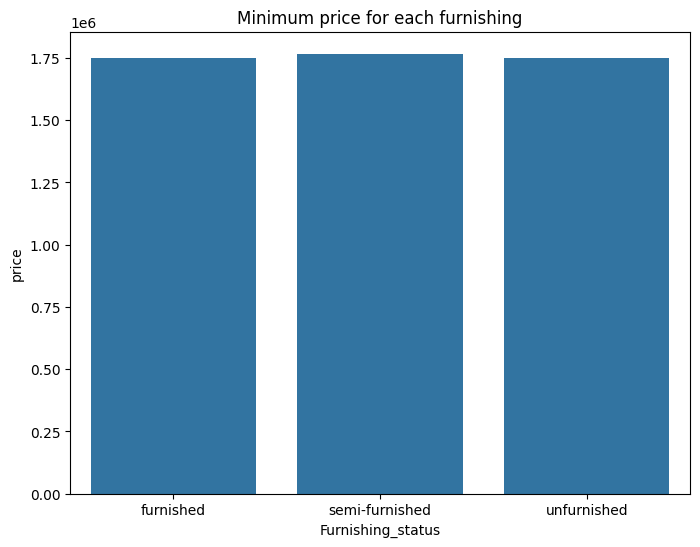

In [14]:
min_charges = df.groupby('furnishingstatus')['price'].min().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='furnishingstatus',y='price',data=min_charges)
plt.title('Minimum price for each furnishing')
plt.xlabel('Furnishing_status')
plt.ylabel('price')
plt.show()

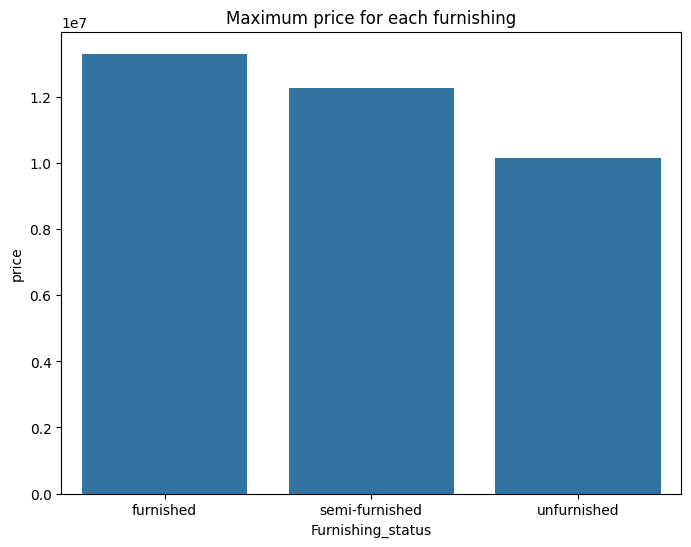

In [15]:
max_charges = df.groupby('furnishingstatus')['price'].max().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='furnishingstatus',y='price',data=max_charges)
plt.title('Maximum price for each furnishing')
plt.xlabel('Furnishing_status')
plt.ylabel('price')
plt.show()

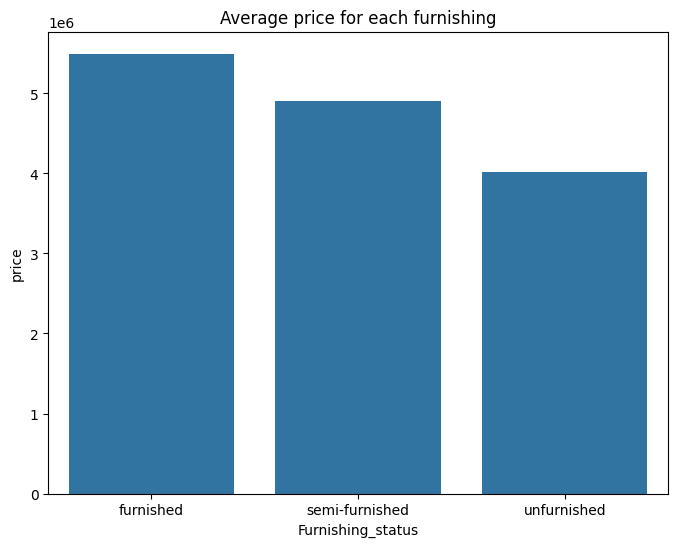

In [16]:
avg_charges = df.groupby('furnishingstatus')['price'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='furnishingstatus',y='price',data=avg_charges)
plt.title('Average price for each furnishing')
plt.xlabel('Furnishing_status')
plt.ylabel('price')
plt.show()

In [17]:
data = df.drop(columns=['hotwaterheating','prefarea'])

In [36]:
df['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [18]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,yes,2,furnished


In [19]:
df2 = pd.get_dummies(data,drop_first='if_binary').astype(int)
df2.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0
3,12215000,7500,4,2,2,3,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,1,0,0


In [20]:
x = df2.drop('price',axis=1)
y = df2['price']
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,1,0,0
1,8960,4,4,4,3,1,0,0,1,0,0
2,9960,3,2,2,2,1,0,1,0,1,0
3,7500,4,2,2,3,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,1,0,0


In [21]:
# training and testing split..
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [23]:
# model or algorithm training...
from sklearn.ensemble import RandomForestRegressor

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
rdr = RandomForestRegressor()

# training algorithm...

rdr.fit(x_train,y_train)
print("RandomForestRegressor successfully trained.")

print("RandomForestRegressor Training score: ",rdr.score(x_train,y_train) * 100)
print("RandomForestRegressor Testing score: ",rdr.score(x_test,y_test) * 100)

RandomForestRegressor successfully trained.
RandomForestRegressor Training score:  95.01729954483926
RandomForestRegressor Testing score:  57.727560685056346


In [26]:
import joblib,os

In [27]:
os.makedirs('models',exist_ok=True)

In [28]:
joblib.dump(rdr,"./models/randomforest_model.lb")
print("successfully saved your algorithm at this location : ./models/randomforest_model")

successfully saved your algorithm at this location : ./models/randomforest_model


In [29]:
randomforest_prediction = rdr.predict(x_test)

In [30]:
compare_df = pd.concat([x_test,y_test],axis='columns')
compare_df['randomforest_prediction'] = randomforest_prediction
compare_df.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price,randomforest_prediction
503,4000,3,1,1,0,1,0,0,0,1,0,2660000,3883600.0
259,6360,2,1,1,1,1,0,1,1,0,0,4473000,5336170.0
275,4032,2,1,1,0,1,0,1,0,0,0,4319000,3929240.0
451,6750,2,1,1,0,1,0,0,0,1,0,3150000,3843070.0
52,6000,4,2,4,1,1,1,0,1,0,0,7350000,7297500.0


In [31]:
os.makedirs('prediction',exist_ok=True)

In [32]:
compare_df.to_csv('./prediction/.prediction.csv',index=False)
print('saved')

saved
